# Predict diabetes through data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
!ls

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [5]:
"""
from google.colab import files
uploaded = files.upload()
"""

'\nfrom google.colab import files\nuploaded = files.upload()\n'

위의 문장은 경고를 무시하기 위한 문장으로 없어도 무방하다.

## data preprocessing

In [6]:
data = pd.read_excel("./kosfi3.xlsx")

In [7]:
data.head()

,date,the_open,the_high,the_low,the_close,the_vol,usd_kor,nasdaq,open_by_open_1,high_by_open_1,usd_by_yes_1,nas_by_yes_1,good_bad
0,2015-12-17,10240,10405,9970,10330,946156,1183.06,5002.549805,NaN,NaN,NaN,NaN,NaN
1,2015-12-18,10230,10710,10165,10710,1841150,1180.43,4923.080078,0.999023,1.017107,1.002228,0.984114,1.0
2,2015-12-21,10695,10825,10670,10720,1274858,1173.61,4968.919922,1.045455,1.001403,1.005811,1.009311,0.0
3,2015-12-22,10740,10750,10450,10495,1374974,1169.11,5001.109863,1.004208,1.007914,1.003849,1.006478,0.0
4,2015-12-23,10535,10635,10415,10425,2532341,1172.16,5045.930176,0.980912,1.020408,0.997398,1.008962,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 13 columns):
date              982 non-null datetime64[ns]
the_open          982 non-null int64
the_high          982 non-null int64
the_low           982 non-null int64
the_close         982 non-null int64
the_vol           982 non-null int64
usd_kor           982 non-null float64
nasdaq            982 non-null float64
open_by_open_1    981 non-null float64
high_by_open_1    981 non-null float64
usd_by_yes_1      981 non-null float64
nas_by_yes_1      981 non-null float64
good_bad          981 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(5)
memory usage: 99.9 KB


  .info() : 해당 데이터프레임의 상세한 정보를 볼 수 있다.  
  데이터의 총 개수(0~n행까지), 데이터의 칼럼명, 데이터의 개수, 데이터의 타입을 확인할 수 있다.  
  반드시 데이터의 타입을 확인해야 한다. 

In [9]:
data.describe()

,the_open,the_high,the_low,the_close,the_vol,usd_kor,nasdaq,open_by_open_1,high_by_open_1,usd_by_yes_1,nas_by_yes_1,good_bad
count,982.000000,982.000000,982.000000,982.000000,9.820000e+02,982.000000,982.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,12311.532587,12526.761711,12075.010183,12302.856415,1.022008e+07,1138.532968,6619.825847,1.000206,1.016697,1.000033,1.000645,0.316004
std,4665.200542,4806.259791,4514.068082,4672.922730,1.060991e+07,39.154951,1203.990895,0.029851,0.024111,0.005511,0.010249,0.465152
min,5510.000000,5980.000000,5420.000000,5560.000000,3.294170e+05,1053.730000,4266.839844,0.798551,0.951950,0.974928,0.955746,0.000000
25%,9038.750000,9138.750000,8841.250000,8965.000000,1.910515e+06,1116.715000,5437.510132,0.985259,1.002329,0.996514,0.996714,0.000000
50%,10680.000000,10770.000000,10542.500000,10672.500000,7.236099e+06,1133.315000,6859.424805,1.000925,1.010555,0.999938,1.000777,0.000000
75%,13913.750000,14305.000000,13648.750000,13841.250000,1.528816e+07,1168.550000,7688.494873,1.016016,1.024744,1.003471,1.006035,1.000000
max,28560.000000,28920.000000,27750.000000,28395.000000,7.919622e+07,1241.130000,8945.650391,1.145416,1.253176,1.020039,1.058363,1.000000


In [10]:
data = data.dropna()
data.head()

,date,the_open,the_high,the_low,the_close,the_vol,usd_kor,nasdaq,open_by_open_1,high_by_open_1,usd_by_yes_1,nas_by_yes_1,good_bad
1,2015-12-18,10230,10710,10165,10710,1841150,1180.43,4923.080078,0.999023,1.017107,1.002228,0.984114,1.0
2,2015-12-21,10695,10825,10670,10720,1274858,1173.61,4968.919922,1.045455,1.001403,1.005811,1.009311,0.0
3,2015-12-22,10740,10750,10450,10495,1374974,1169.11,5001.109863,1.004208,1.007914,1.003849,1.006478,0.0
4,2015-12-23,10535,10635,10415,10425,2532341,1172.16,5045.930176,0.980912,1.020408,0.997398,1.008962,0.0
5,2015-12-24,10480,10525,10290,10295,1536790,1167.88,5048.490234,0.994779,1.014790,1.003665,1.000507,0.0


.describe() : 데이터프레임의 상세한 정보(개수, 평균, 표준편차 등)를 볼 수 있다. 

In [11]:
# Check missing values
data.isnull().sum()

date              0
the_open          0
the_high          0
the_low           0
the_close         0
the_vol           0
usd_kor           0
nasdaq            0
open_by_open_1    0
high_by_open_1    0
usd_by_yes_1      0
nas_by_yes_1      0
good_bad          0
dtype: int64

위의 결과를 보았을 때, 결측치가 0인 것을 알 수 있다. 

In [12]:
X_columns = ["open_by_open_1", "high_by_open_1", "usd_by_yes_1", "nas_by_yes_1"]
X = data[X_columns]
y_columns = ["good_bad"]
y = data[y_columns]
print(f"X shape:{X.shape}, y shape:{y.shape}")

X shape:(981, 4), y shape:(981, 1)


X는 0~7행까지로 임신횟수부터 나이까지의 행으로 독립변수이다.  
y는 8행으로 당뇨병의 결과(0,1)를 의미한다. 종속변수이다. 

In [13]:
X.head()

,open_by_open_1,high_by_open_1,usd_by_yes_1,nas_by_yes_1
1,0.999023,1.017107,1.002228,0.984114
2,1.045455,1.001403,1.005811,1.009311
3,1.004208,1.007914,1.003849,1.006478
4,0.980912,1.020408,0.997398,1.008962
5,0.994779,1.014790,1.003665,1.000507


In [14]:
y.head()

,good_bad
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0


위의 결과를 보았을 때 X에는 Pregnancies~Age 까지의 데이터프레임이고, y는 당뇨병결과(outcome)만 들어있는 데이터프레임인 것을 알 수 있다. 

shape를 통해 데이터셋의 모양을 확인한다.

In [15]:
print(X.shape, y.shape)

(981, 4) (981, 1)


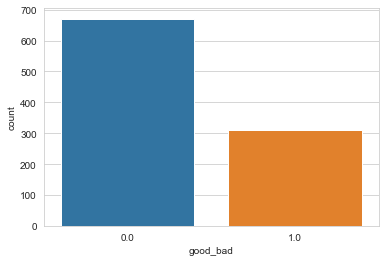

In [16]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(data['good_bad'],label="Count")

결과의 개수를 나타낸 표이다.   
당뇨병 아닌 사람 : 500명   
    당뇨병인 사람 : 268명

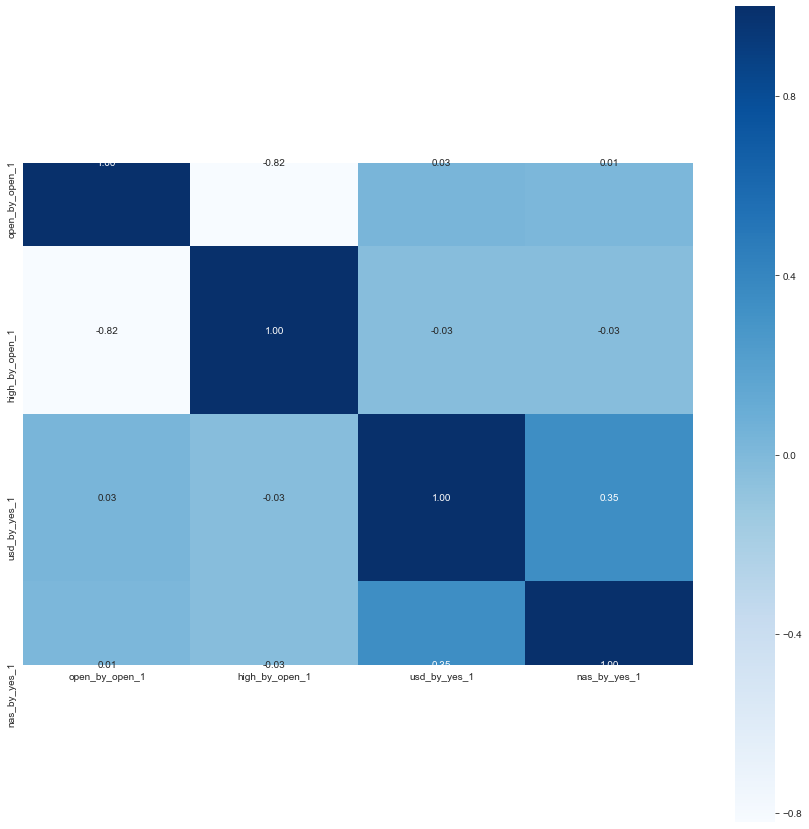

In [17]:
correlation = X.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, fmt = '.2f',cmap='Blues', square=True)

상관관계분석을 위하여 heatmap을 작성했다.   
  
0.54 : 나이와 임신횟수  
0.47 : 당뇨병 여부와 글루코오스  
0.44 : 인슐린과 피부두께  
0.39 : BMI와 피부두께  
0.29 : BMI와 당뇨병여부

## k-Nearest Neighbors

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2)

테스트 데이터셋의 비율은 20퍼센트이다. 나머지는 훈련 데이터셋으로 사용한다.

In [19]:
import tensorflow as tf
from tensorflow.keras import *
y_train_mlp = np.array(list(map(lambda i: [1,0] if i == 0 else [0,1], y_train)))
y_test_mlp = np.array(list(map(lambda i: [1,0] if i == 0 else [0,1], y_test)))
X_train_mlp = X_train.to_numpy()
X_test_mlp = X_test.to_numpy()

In [20]:
model = models.Sequential([
    layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [21]:
model.compile(optimizer = optimizers.Adam(lr=1e-5), metrics=["accuracy"], loss='categorical_crossentropy')

In [22]:
model.fit(X_train_mlp, y_train_mlp, validation_data=(X_test_mlp, y_test_mlp), epochs=100)

Train on 784 samples, validate on 197 samples
Epoch 1/100
784/784 [==============================] - 1s 2ms/sample - loss: 0.6840 - accuracy: 0.6811 - val_loss: 0.6820 - val_accuracy: 0.6954
Epoch 2/100
784/784 [==============================] - 0s 131us/sample - loss: 0.6820 - accuracy: 0.6811 - val_loss: 0.6798 - val_accuracy: 0.6954
Epoch 3/100
784/784 [==============================] - 0s 115us/sample - loss: 0.6800 - accuracy: 0.6811 - val_loss: 0.6777 - val_accuracy: 0.6954
Epoch 4/100
784/784 [==============================] - 0s 119us/sample - loss: 0.6781 - accuracy: 0.6811 - val_loss: 0.6758 - val_accuracy: 0.6954
Epoch 5/100
784/784 [==============================] - 0s 128us/sample - loss: 0.6763 - accuracy: 0.6811 - val_loss: 0.6738 - val_accuracy: 0.6954
Epoch 6/100
784/784 [==============================] - 0s 122us/sample - loss: 0.6746 - accuracy: 0.6811 - val_loss: 0.6719 - val_accuracy: 0.6954
Epoch 7/100
784/784 [==============================] - 0s 111us/sample - l

784/784 [==============================] - 0s 161us/sample - loss: 0.6313 - accuracy: 0.6811 - val_loss: 0.6234 - val_accuracy: 0.6954
Epoch 57/100
784/784 [==============================] - 0s 147us/sample - loss: 0.6311 - accuracy: 0.6811 - val_loss: 0.6230 - val_accuracy: 0.6954
Epoch 58/100
784/784 [==============================] - 0s 126us/sample - loss: 0.6308 - accuracy: 0.6811 - val_loss: 0.6227 - val_accuracy: 0.6954
Epoch 59/100
784/784 [==============================] - 0s 151us/sample - loss: 0.6306 - accuracy: 0.6811 - val_loss: 0.6223 - val_accuracy: 0.6954
Epoch 60/100
784/784 [==============================] - 0s 117us/sample - loss: 0.6303 - accuracy: 0.6811 - val_loss: 0.6221 - val_accuracy: 0.6954
Epoch 61/100
784/784 [==============================] - 0s 116us/sample - loss: 0.6301 - accuracy: 0.6811 - val_loss: 0.6218 - val_accuracy: 0.6954
Epoch 62/100
784/784 [==============================] - 0s 124us/sample - loss: 0.6299 - accuracy: 0.6811 - val_loss: 0.6215 

In [23]:
model.predict(X_test_mlp)

array([[0.6700586 , 0.32994136],
       [0.66968435, 0.33031565],
       [0.6684377 , 0.33156228],
       [0.6700521 , 0.32994792],
       [0.6688185 , 0.33118156],
       [0.6689957 , 0.33100426],
       [0.6682303 , 0.3317697 ],
       [0.6696336 , 0.33036634],
       [0.6694869 , 0.33051315],
       [0.6682547 , 0.3317453 ],
       [0.66962737, 0.33037263],
       [0.66982806, 0.3301719 ],
       [0.6684629 , 0.33153713],
       [0.6682266 , 0.33177337],
       [0.66911185, 0.33088806],
       [0.6690503 , 0.33094966],
       [0.6674153 , 0.33258468],
       [0.66986036, 0.33013955],
       [0.6686966 , 0.33130336],
       [0.6694276 , 0.3305725 ],
       [0.66838413, 0.3316158 ],
       [0.6685308 , 0.3314691 ],
       [0.6698801 , 0.33011988],
       [0.6693251 , 0.33067492],
       [0.6706276 , 0.3293724 ],
       [0.6669315 , 0.3330684 ],
       [0.6684972 , 0.33150274],
       [0.6690013 , 0.33099875],
       [0.6700609 , 0.32993907],
       [0.66845006, 0.3315499 ],
       [0.

In [29]:
a = np.array([[1.91,1.91,1.91,1.91]])
model.predict(a)

array([[0.7749023 , 0.22509775]], dtype=float32)

In [30]:
a = np.array([[0.91,0.91,0.91,0.91]])
model.predict(a)

array([[0.6561498 , 0.34385014]], dtype=float32)